In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
hbar=1.054e-34
k=6.283/1064e-9
k2=k**2
hbar2=hbar**2
m=40*1.66e-27
Er=(hbar2*k2)/(2*m)
s=5
Omega=s*Er

H = hbar*k*np.array([[1,0],[0,-1]])+Omega*np.array([[0,1],[1,0]])
print(H)
print(type(H))

[[  6.22394925e-28   1.45849188e-29]
 [  1.45849188e-29  -6.22394925e-28]]
<class 'numpy.ndarray'>


In [4]:
ev=np.linalg.eig(H)
print(ev[0])
print(ev[1])
e_val = ev[0]
e_vec = ev[1]



[  6.22565790e-28  -6.22565790e-28]
[[ 0.99993138 -0.01171436]
 [ 0.01171436  0.99993138]]


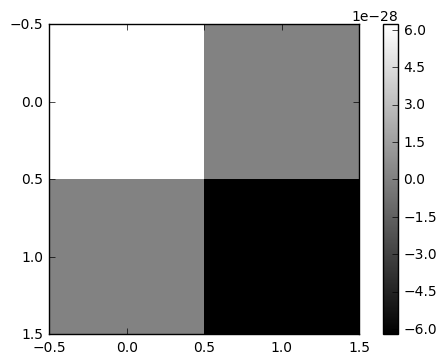

In [5]:
plt.imshow(H, interpolation='nearest', cmap='gray')
plt.colorbar()

In [6]:
hbar=1.054e-34
k=6.283/1064e-9
k2=k**2
hbar2=hbar**2
m=40*1.66e-27
c=3e8
p=hbar*k/(2*m*c)
p2=hbar*c*k
Er=(hbar2*k2)/(2*m)
s=1
Omega=s*Er
def ham(hbar,c,k,s,Er):
    H = hbar*c*k*np.array([[1,0],[0,-1]])+s*Er*np.array([[0,1],[1,0]])
    return H
print(p2)
print(ham(hbar,c,k,5, Er))

1.8671847744360903e-19
[[  1.86718477e-19   1.45849188e-29]
 [  1.45849188e-29  -1.86718477e-19]]


In [7]:
hbar=1.054e-34
k=6.283/1064e-9
k2=k**2
hbar2=hbar**2
m=40*1.66e-27
c=3e8
p=hbar*k/(2*m*c)
Er=(hbar2*k2)/(2*m)
s=100
Omega=s*Er
def ham(s):
    H = hbar*c*k*np.matrix([[1,0],[0,-1]])+s*Er*np.matrix([[0,1],[1,0]])
    return H

eigenvals,eigenvects=np.linalg.eig(ham(s))
print(eigenvals)
print(eigenvects)
print(np.linalg.eig(ham(1))[0])
print(np.linalg.eig(ham(100))[0])
print(np.linalg.eig(ham(1e11))[0])

[  1.86718477e-19  -1.86718477e-19]
[[  1.00000000e+00  -7.81118226e-10]
 [  7.81118226e-10   1.00000000e+00]]
[  1.86718477e-19  -1.86718477e-19]
[  1.86718477e-19  -1.86718477e-19]
[  3.46340486e-19  -3.46340486e-19]


[-0.91542606  3.99865332  4.91707883]


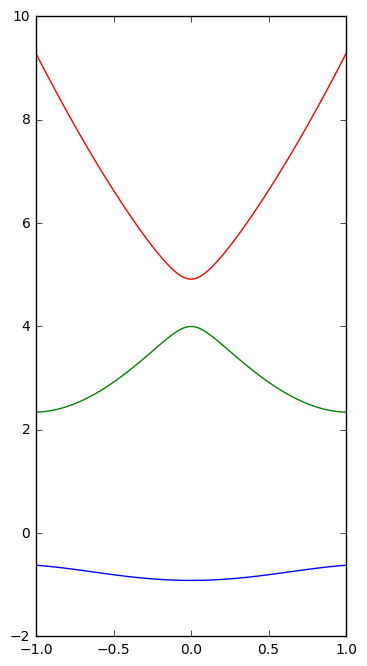

In [8]:
def ham(q,s):
    H = np.matrix([[(q-2)**2,-s/(4),0],[-s/(4),q**2,-s/(4)],[0,-s/(4),(q+2)**2]])
    return H
matrix_dimension = ham(0,0).shape[0]
num_points=100
q_vec = np.linspace(-1,1,num_points)
s_calc = 6 
ev_vec = np.zeros(shape=(matrix_dimension,num_points))
for i in range(num_points):
    h_matrix = ham(q_vec[i], s_calc)
    eigenvals=np.linalg.eigvals(h_matrix)
    eigenvals=np.sort(eigenvals)
    ev_vec[:,i] = eigenvals
    
print(ev_vec[:,50])
# Change the aspect ratio for the plot
plt.figure(figsize=(4,8))
# Plot, eigenvalue 0
plt.plot(q_vec, ev_vec[0,:])
# Plot, eigenvalue 1
plt.plot(q_vec, ev_vec[1,:])
# Plot, eigenvalue 2
plt.plot(q_vec, ev_vec[2,:])


[ -2.91757893e-30   2.91757893e-30]


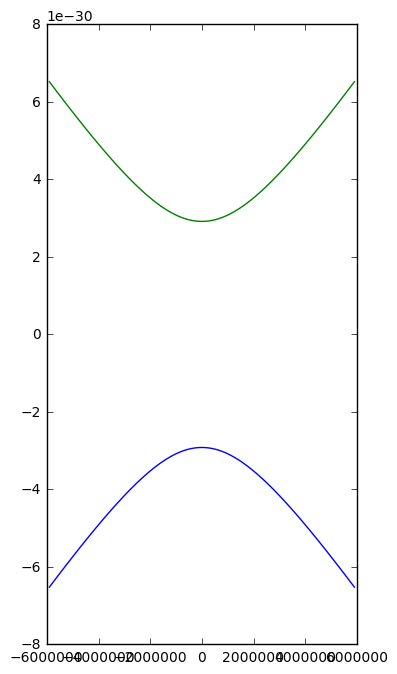

In [14]:
def hamp(q,s):
    H = (hbar**2*k/(m))*np.matrix([[q,0],[0,-q]])+s*Er*np.matrix([[0,1],[1,0]])
    return H
matrix_dimension = hamp(0,0).shape[0]
num_points=100
q_vec = np.linspace(-1*k,1*k,num_points)
s_calc = 1 
ev_vec = np.zeros(shape=(matrix_dimension,num_points))
for i in range(num_points):
    h_matrix = hamp(q_vec[i], s_calc)
    eigenvals=np.linalg.eigvals(h_matrix)
    eigenvals=np.sort(eigenvals)
    ev_vec[:,i] = eigenvals
    
print(ev_vec[:,50])
# Change the aspect ratio for the plot
plt.figure(figsize=(4,8))
# Plot, eigenvalue 0
plt.plot(q_vec, ev_vec[0,:])
# Plot, eigenvalue 1
plt.plot(q_vec, ev_vec[1,:])